## Road Cracks Detection

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image

Dataset you can find here : https://data.mendeley.com/datasets/5y9wdsg2zt/1

Folder Format:
    crack<br>
        train<br>
            ---positive<br>
            ---Negative<br>
        valid<br>
            ---positive<br>
            ---Negative<br>
        test<br>
            ---positive<br>
            ---Negative<br>

In [2]:
train_dir = '/Users/sakib/Downloads/Crack/train/'
test_dir = '/Users/sakib/Downloads/Crack/test/'
val_dir ='/Users/sakib/Downloads/Crack/valid/'

Let's visual the dataset

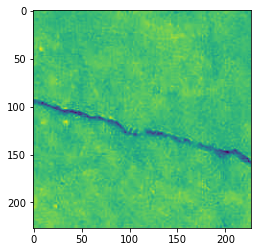

In [3]:
img_dir = '/Users/sakib/Downloads/Crack/train/positive/00021.jpg'
image =  plt.imread(img_dir)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)

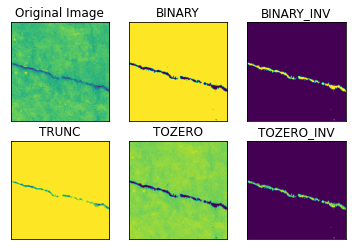

In Grayscale


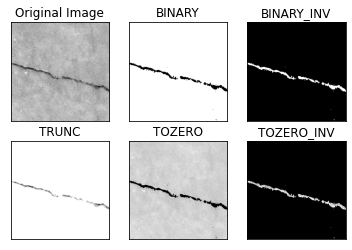

In [4]:
#FOR Postive images
img = cv2.imread(img_dir,0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

print('In Grayscale')
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

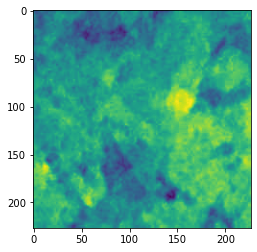

In [5]:
img_dir = '/Users/sakib/Downloads/Crack/train/negative/00020.jpg'
image =  plt.imread(img_dir)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)

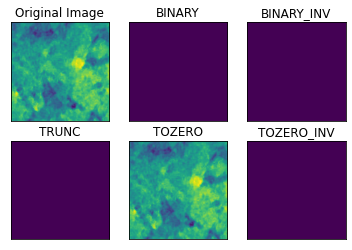

In Grayscale


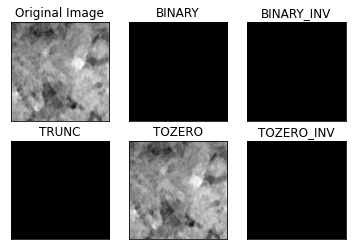

In [6]:
#For negative images
img = cv2.imread(img_dir,0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

print('In Grayscale')
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Functions For Processing Images And Creating Data

In [7]:
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpg'
        image = cv2.imread(dir_, 0)
        bi_inv, colored_img = process_image(image)
        colored_data.append(colored_img)
        bi_inv_data.append(bi_inv)   
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data

**Traning**

In [8]:
train_data_colr= []
train_labels=[]
train_data_inv = []

train_data_colr_pos, train_data_inv_pos=  create_data(train_dir, 'positive', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_pos)):
    train_data_colr.append(train_data_colr_pos[i])
    train_data_inv.append(train_data_inv_pos[i])
    train_labels.append(1)

train_data_colr_neg, train_data_inv_neg=  create_data(train_dir, 'negative', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_neg)):
    train_data_colr.append(train_data_colr_neg[i])
    train_data_inv.append(train_data_inv_neg[i])
    train_labels.append(0)
    

final_train_colr = np.array(train_data_colr).reshape(((len(train_data_colr), 227, 227, 1)))        
final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), 227, 227, 1)))   

print('Shape of Training Data : '+str(final_train_colr.shape))

Working On Training Data : positive

Images Processed from 00001 to 01500

Working On Training Data : negative

Images Processed from 00001 to 01500

Shape of Training Data : (3000, 227, 227, 1)


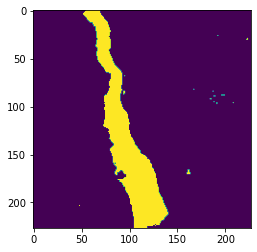

In [9]:
plt.imshow(train_data_inv_pos[10])

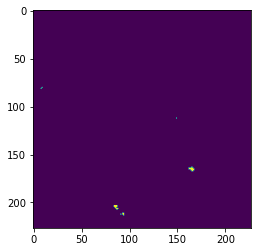

In [10]:
plt.imshow(train_data_inv_neg[15])

**Validation**

In [11]:
val_data_colr= []
val_labels=[]
val_data_inv = []

val_data_colr_pos, val_data_inv_pos=  create_data(val_dir, 'positive', 1701, 2000, 'Validation')


for i in range(0, len(val_data_colr_pos)):
    val_data_colr.append(val_data_colr_pos[i])
    val_data_inv.append(val_data_inv_pos[i])
    val_labels.append(1)

val_data_colr_neg, val_data_inv_neg=  create_data(val_dir, 'negative', 1701, 2000, 'Validation')

for i in range(0, len(val_data_colr_neg)):
    val_data_colr.append(val_data_colr_neg[i])
    val_data_inv.append(val_data_inv_neg[i])
    val_labels.append(0)
    
final_val_colr = np.array(val_data_colr).reshape(((len(val_data_colr), 227, 227, 1)))    
final_val_inv = np.array(val_data_inv).reshape(((len(val_data_inv), 227, 227, 1)))   

print('Shape of Validation Data : '+str(final_val_colr.shape))

Working On Validation Data : positive

Images Processed from 01701 to 02000

Working On Validation Data : negative

Images Processed from 01701 to 02000

Shape of Validation Data : (600, 227, 227, 1)


**Test**

In [12]:
test_data_colr= []
test_labels=[]
test_data_inv = []

test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'positive', 1501, 1700, 'Testing')


for i in range(0, len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv.append(test_data_inv_pos[i])
    test_labels.append(1)

test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'negative', 1501, 1700, 'Testing')

for i in range(0, len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv.append(test_data_inv_neg[i])
    test_labels.append(0)
    
final_test_colr = np.array(test_data_colr).reshape(((len(test_data_colr), 227, 227, 1)))    
final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), 227, 227, 1)))   

print('Shape of Testing Data : '+str(final_test_colr.shape))

Working On Testing Data : positive

Images Processed from 01501 to 01700

Working On Testing Data : negative

Images Processed from 01501 to 01700

Shape of Testing Data : (400, 227, 227, 1)


In [13]:
train_labels[20]

1

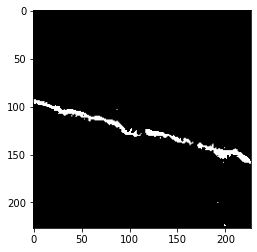

In [14]:
plt.imshow(train_data_inv[20], 'gray')

## Build the Convulation Neural Network (CNN)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model

Using TensorFlow backend.


In [16]:
#Set the input shape
input_shape = (227, 227, 1)

#kernel_size
Wh = 3
Ww = 3

In [17]:
#Basic CNN 
model = Sequential()

model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [32]:
#set the batch size and number of epochs
batch_size = 250
epochs = 20

In [33]:
#Training
#For loss used binary because we have two classes positive and negative
#For optimizer used 'RMSprop(root means Square)'

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(final_train_inv, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(final_val_inv, val_labels))

Train on 3000 samples, validate on 600 samples
Epoch 1/20
3000/3000 [==============================] - 364s 121ms/step - loss: 2.6100 - accuracy: 0.8093 - val_loss: 0.3686 - val_accuracy: 0.8900
Epoch 2/20
3000/3000 [==============================] - 335s 112ms/step - loss: 0.1920 - accuracy: 0.9407 - val_loss: 0.0786 - val_accuracy: 0.9683
Epoch 3/20
3000/3000 [==============================] - 323s 108ms/step - loss: 0.1307 - accuracy: 0.9600 - val_loss: 0.1548 - val_accuracy: 0.9167
Epoch 4/20
3000/3000 [==============================] - 318s 106ms/step - loss: 0.0863 - accuracy: 0.9667 - val_loss: 0.0675 - val_accuracy: 0.9767
Epoch 5/20
3000/3000 [==============================] - 326s 109ms/step - loss: 0.4452 - accuracy: 0.9277 - val_loss: 0.1720 - val_accuracy: 0.9350
Epoch 6/20
3000/3000 [==============================] - 344s 115ms/step - loss: 0.1054 - accuracy: 0.9563 - val_loss: 0.0784 - val_accuracy: 0.9567
Epoch 7/20
3000/3000 [==============================] - 337s 112m

In [34]:
#Accuracy & Loss
score = model.evaluate(final_test_inv, test_labels)
print('Final Accuracy : ', score[1]*100, "%" )
print('Final Loss : ', score[0])

400/400 [==============================] - 19s 46ms/step
Final Accuracy :  94.49999928474426 %
Final Loss :  0.2485734383389354


In [35]:
#Create Prediction Function
def predict_image_util(final_pred_inv):
    img_test = (final_pred_inv[0].reshape((1, 227, 227, 1)))  
    raw_predicted_label = model.predict(img_test, batch_size=None, verbose=0, steps=None)[0][0]
    
    predicted_label=1;    
    if(raw_predicted_label<0.8):
        predicted_label=0
        
    predicted_label_str='Crack'    
    if(predicted_label==0):
        predicted_label_str='No Crack'
        
    print('Raw Predicted Label(Numeric): '+str(raw_predicted_label))
    print('\nPredicted Label : '+predicted_label_str)

In [36]:
#from_data_dir = '/Users/sakib/Downloads/Crack/origin'  #Directory '/Users/sakib/Downloads/Crack/origin/'
#/Users/sakib/Downloads
from_data_dir = '/Users/sakib/Downloads/original/'  #Directory

def predict_image2(type_, num):
    
    pred_data_colr_, pred_data_inv_ = create_data(from_data_dir, type_, num, num+1, 'Predictable')
    plt.imshow(pred_data_colr_[0])
    pred_data_colr =[]
    pred_data_inv = []
    
    pred_data_inv.append(pred_data_inv_[0])
    pred_data_colr.append(pred_data_colr_[0])
    
    final_pred_colr = np.array(pred_data_colr).reshape(((len(pred_data_colr), 227, 227, 1)))  
    final_pred_inv = np.array(pred_data_inv).reshape(((len(pred_data_inv), 227, 227, 1)))
    predict_image_util(final_pred_inv)
    
    return predict_image2

Working On Predictable Data : Negative

Images Processed from 04100 to 04101

Raw Predicted Label(Numeric): 0.0

Predicted Label : No Crack


<function __main__.predict_image2(type_, num)>

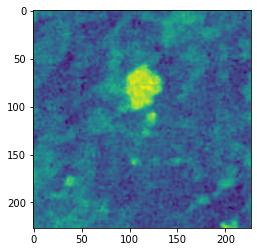

In [37]:
predict_image2('Negative',4100)

Working On Predictable Data : positive

Images Processed from 01111 to 01112

Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack


<function __main__.predict_image2(type_, num)>

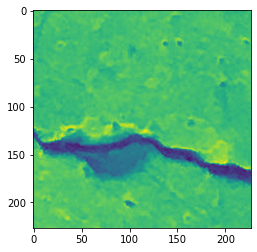

In [38]:
predict_image2('positive', 1111)

---

END